In [ ]:
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pickle

# Import data
path = os.listdir(
    r'C:\Users\Abhishek Patwardhan\Desktop\TE-Project\BTWebsite\DataSet\Training')
classes = {'glioma_tumor': 0, 'meningioma_tumor': 1,
           'no_tumor': 2, 'pituitary_tumor': 3}

X = []
Y = []
for cls in classes:
    # pth = r'C:\Users\Abhishek Patwardhan\Desktop\TE-Project\DataSet\Training'+cls
    if cls == "glioma_tumor":
        pth = r"C:\Users\Abhishek Patwardhan\Desktop\TE-Project\BTWebsite\DataSet\Training\glioma_tumor"
    elif cls == "meningioma_tumor":
        pth = r"C:\Users\Abhishek Patwardhan\Desktop\TE-Project\BTWebsite\DataSet\Training\meningioma_tumor"
    elif cls == "no_tumor":
        pth = r"C:\Users\Abhishek Patwardhan\Desktop\TE-Project\BTWebsite\DataSet\Training\no_tumor"
    elif cls == "pituitary_tumor":
        pth = r"C:\Users\Abhishek Patwardhan\Desktop\TE-Project\BTWebsite\DataSet\Training\pituitary_tumor"

    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

print(np.unique(Y))

X = np.array(X)
Y = np.array(Y)

print(pd.Series(Y).value_counts())

X.shape

# Visualize Data - To check particular image
# plt.imshow(X[0], cmap='gray')
# plt.show()

# Prepare Data
X_updated = X.reshape(len(X), -1)
print(X_updated.shape)

# Split Data
xtrain, xtest, ytrain, ytest = train_test_split(
    X_updated, Y, random_state=10, test_size=.20)

print(xtrain.shape, xtest.shape)


# Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


# Feature Selection : PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest


# Train Model
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


sv = SVC()
sv.fit(pca_train, ytrain)


# Evaluation
# print("Training Score : ", lg.score(pca_train, ytrain))
# print("Testing Score : ", lg.score(pca_test, ytest))

# print("Training Score : ", sv.score(pca_train, ytrain))
# print("Testing Score : ", sv.score(pca_test, ytest))

# Prediction
pred = sv.predict(pca_test)
print(np.where(ytest != pred))

# plt.scatter(xtrain,ytrain,c=ytrain,cmap='rainbow')
# plt.title('Scatter Plot')
# plt.show()

# Test Model
dec = {0: 'glioma_tumor', 1: 'meningioma_tumor',
       2: 'no_tumor', 3: 'pituitary_tumor'}

plt.figure(figsize=(12, 8))
p = os.listdir(
    r'C:/Users/Abhishek Patwardhan/Desktop/TE-Project\BTWebsite/DataSet/Testing/')
c = 1
for i in os.listdir(r'C:/Users/Abhishek Patwardhan/Desktop/TE-Project\BTWebsite/DataSet/Testing/Unseen/')[:16]:
    plt.subplot(4, 4, c)

    img = cv2.imread(
        r'C:/Users/Abhishek Patwardhan/Desktop/TE-Project\BTWebsite/DataSet/Testing/Unseen/'+i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1
plt.show()



filename = 'BT-model'
pickle.dump(lg,open(filename,'wb'))

In [1]:
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pickle

In [3]:
# Import data
path = os.listdir(
    r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\train')
classes = {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1,
           'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}

In [4]:
X = []
Y = []
for cls in classes:
    pth = r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\train'+cls
    if cls == "Bacterial Pneumonia":
        pth = r"C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\train\Bacterial Pneumonia"
    elif cls == "Corona Virus Disease":
        pth = r"C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\train\Corona Virus Disease"
    elif cls == "Normal":
        pth = r"C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\train\Normal"
    elif cls == "Tuberculosis":
        pth = r"C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\train\Tuberculosis"
    elif cls == "Viral Pneumonia":
        pth = r"C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\train\Viral Pneumonia"

    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

print(np.unique(Y))

X = np.array(X)
Y = np.array(Y)

print(pd.Series(Y).value_counts())

X.shape

[0 1 2 3 4]
3    1220
1    1218
2    1207
0    1205
4    1204
dtype: int64


(6054, 200, 200)

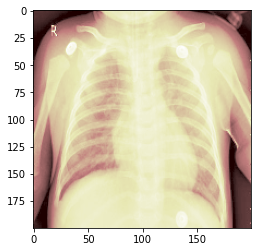

In [5]:
# Visualize Data - To check particular image
plt.imshow(X[150], cmap='pink')
plt.show()


In [6]:
# Prepare Data
X_updated = X.reshape(len(X), -1)
print(X_updated.shape)

(6054, 40000)


# SPLITTING THE DATA

In [7]:

xtrain, xtest, ytrain, ytest = train_test_split(
    X_updated, Y, random_state=10, test_size=.20)

print(xtrain.shape, xtest.shape)

(4843, 40000) (1211, 40000)


In [7]:
# Feature Scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [8]:
# Feature Selection : PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(4843, 40000) (1211, 40000)


In [9]:
# Train Model
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)



LogisticRegression(C=0.1)

# EVALUATION(LG)

In [10]:
# Evaluation
print("Training Score : ", lg.score(xtrain, ytrain))
print("Testing Score : ", lg.score(xtest, ytest))

Training Score :  0.755729919471402
Testing Score :  0.6358381502890174


In [12]:
pred=lg.predict(xtest)

In [13]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   6,    7,    9,   11,   14,   15,   16,   18,   19,   24,   28,
          29,   31,   35,   38,   41,   46,   48,   49,   53,   58,   64,
          66,   68,   79,   81,   82,   83,   84,   85,   86,   90,   94,
          97,  104,  105,  107,  110,  118,  141,  143,  145,  146,  147,
         152,  153,  154,  157,  159,  160,  164,  166,  177,  178,  179,
         183,  184,  185,  186,  188,  189,  192,  195,  198,  205,  207,
         211,  212,  214,  216,  217,  218,  219,  220,  221,  235,  237,
         239,  241,  242,  246,  247,  248,  249,  250,  255,  256,  258,
         260,  262,  266,  267,  270,  272,  275,  278,  279,  282,  285,
         292,  293,  295,  297,  298,  300,  301,  302,  307,  308,  309,
         310,  311,  313,  317,  320,  327,  332,  336,  337,  338,  341,
         344,  345,  346,  347,  348,  351,  353,  354,  356,  357,  360,
         361,  367,  368,  371,  372,  373,  374,  377,  378,  379,  395,
         398,  399,  405,  408,  411, 

In [14]:
print("Total Misclassified Samples:", len(misclassified[0]))
print(pred[351], ytest[351])

Total Misclassified Samples: 441
3 0


<AxesSubplot:>

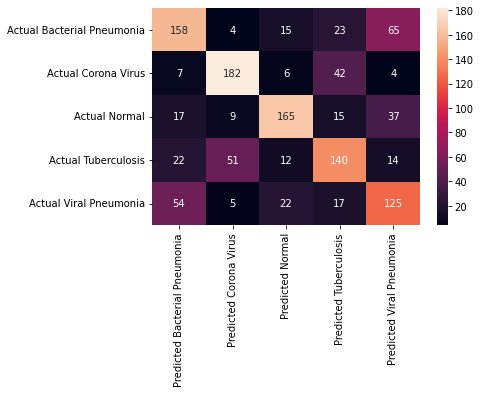

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(ytest, pred, labels = [0,1,2,3,4]),
                  index=["Actual Bacterial Pneumonia","Actual Corona Virus","Actual Normal","Actual Tuberculosis", "Actual Viral Pneumonia"],
                  columns=["Predicted Bacterial Pneumonia","Predicted Corona Virus","Predicted Normal","Predicted Tuberculosis", "Predicted Viral Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")
 

In [16]:
from sklearn import metrics
classification_metrics = metrics.classification_report(ytest, pred,
                                                      target_names =['BACTERIAL PNEUMONIA','CORONA','NORMAL','TUBERCULOSIS','VIRAL PNEUMONIA'])
print(classification_metrics)

                     precision    recall  f1-score   support

BACTERIAL PNEUMONIA       0.61      0.60      0.60       265
             CORONA       0.73      0.76      0.74       241
             NORMAL       0.75      0.68      0.71       243
       TUBERCULOSIS       0.59      0.59      0.59       239
    VIRAL PNEUMONIA       0.51      0.56      0.53       223

           accuracy                           0.64      1211
          macro avg       0.64      0.64      0.64      1211
       weighted avg       0.64      0.64      0.64      1211



In [12]:
warnings.filterwarnings('ignore')
sv = SVC(C=0.1)
sv.fit(xtrain, ytrain)

SVC(C=0.1)

# EVALUATION(SVM)

In [14]:
print("Training Score : ", sv.score(xtrain, ytrain))
print("Testing Score : ", sv.score(xtest, ytest))

Training Score :  0.7160850712368366
Testing Score :  0.7027250206440958


In [ ]:
# Prediction
pred = sv.predict(pca_test)
print(np.where(ytest != pred))

plt.scatter(xtrain,ytrain,c=ytrain,cmap='rainbow')
plt.title('Scatter Plot')
plt.show()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


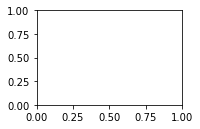

In [18]:
# Test Model
dec = {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1,
           'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}

plt.figure(figsize=(12, 8))
p = os.listdir(
    r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\test')
c = 1
for i in os.listdir(r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\test\Normal')[:16]:
    plt.subplot(4, 4, c)

    img = cv2.imread(
        r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\test\Normal'+i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1
plt.show()



filename = 'model'
pickle.dump(lg,open(filename,'wb'))

In [19]:
pred=sv.predict(xtest)


In [20]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   6,    9,   11,   14,   15,   16,   18,   28,   29,   31,   46,
          48,   49,   53,   58,   60,   66,   72,   76,   79,   80,   81,
          84,   90,  100,  104,  105,  107,  110,  113,  132,  135,  138,
         143,  145,  146,  147,  148,  151,  152,  153,  154,  155,  159,
         164,  166,  173,  177,  179,  183,  184,  185,  186,  187,  188,
         189,  192,  193,  198,  202,  205,  211,  212,  214,  216,  217,
         220,  225,  229,  234,  235,  236,  237,  239,  242,  246,  248,
         250,  256,  258,  259,  260,  262,  264,  266,  267,  270,  275,
         279,  282,  285,  286,  292,  293,  295,  298,  301,  302,  307,
         309,  313,  317,  320,  325,  332,  336,  337,  342,  344,  345,
         347,  351,  356,  360,  368,  371,  372,  373,  374,  377,  378,
         380,  381,  383,  386,  393,  399,  401,  403,  405,  408,  411,
         418,  421,  423,  426,  428,  430,  449,  451,  459,  461,  463,
         467,  469,  474,  476,  488, 

In [25]:
print("Total Misclassified Samples:", len(misclassified[0]))
print(pred[351], ytest[351])

Total Misclassified Samples: 360
4 0


<AxesSubplot:>

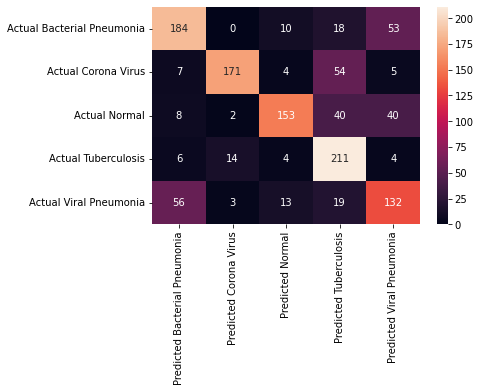

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(ytest, pred, labels = [0,1,2,3,4]),
                  index=["Actual Bacterial Pneumonia","Actual Corona Virus","Actual Normal","Actual Tuberculosis", "Actual Viral Pneumonia"],
                  columns=["Predicted Bacterial Pneumonia","Predicted Corona Virus","Predicted Normal","Predicted Tuberculosis", "Predicted Viral Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")
 

In [31]:
from sklearn import metrics
classification_metrics = metrics.classification_report(ytest, pred,
                                                      target_names =['BACTERIAL PNEUMONIA','CORONA','NORMAL','TUBERCULOSIS','VIRAL PNEUMONIA'])
print(classification_metrics)

                     precision    recall  f1-score   support

BACTERIAL PNEUMONIA       0.70      0.69      0.70       265
             CORONA       0.90      0.71      0.79       241
             NORMAL       0.83      0.63      0.72       243
       TUBERCULOSIS       0.62      0.88      0.73       239
    VIRAL PNEUMONIA       0.56      0.59      0.58       223

           accuracy                           0.70      1211
          macro avg       0.72      0.70      0.70      1211
       weighted avg       0.73      0.70      0.70      1211



error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


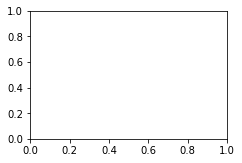

In [71]:
# Test Model
dec= {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1,
           'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}



In [65]:
import cv2
import numpy as np

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


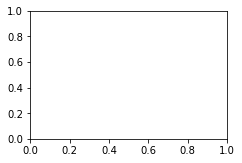

In [68]:
import cv2
plt.figure(figsize=(12, 8))
p = os.listdir(r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\test')
c = 1
pth=r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\test\Normal'
for i in os.listdir(pth)[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread(pth)
    img1 = cv2.resize(img, dsize=(200,200))
    pixels.append(img1)
    d = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1
    


In [69]:
import os
from PIL import Image

img_dir = r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\test\Normal'
for filename in os.listdir(img_dir):
    try :
        with Image.open(img_dir + "/" + filename) as im:
             print('ok')
    except :
        print(img_dir + "/" + filename)
        os.remove(img_dir + "/" + filename)

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
o

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


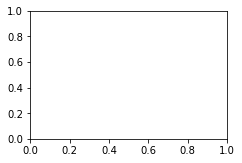

In [ ]:
# Test Model
dec= {'Bacterial Pneumonia': 0, 'Corona Virus Disease': 1,
           'Normal': 2, 'Tuberculosis': 3, 'Viral Pneumonia': 4}


In [76]:
import cv2
plt.figure(figsize=(12, 8))
p= os.listdir(r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\val')
c = 1
pth=r'C:\Users\SANIA\OneDrive\Desktop\ML\Lung Disease Dataset\val\Normal'
for i in os.listdir(pth):
    img = cv2.imread(pth+i,0)
    print(img)
    img= cv2.resize(img,(200,200))
    p= lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1
    

None


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


<Figure size 864x576 with 0 Axes>